In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
sales = pd.read_csv(".//Downloads//Big Sales Mart Retail Store.csv")

In [4]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
sales.shape

(8523, 12)

In [7]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
id = []
for i in range(0, len(sales)):
    a = sales.Item_Identifier[i][:2]
    id.append(a)

In [10]:
sales['Item_Identifier'] = pd.Series(id)

In [11]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


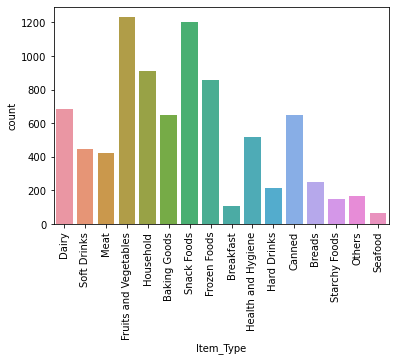

In [12]:
sns.countplot(sales.Item_Type)
plt.xticks(rotation = 90)
plt.show()

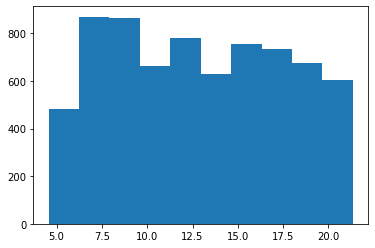

In [13]:
plt.hist(sales.Item_Weight)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


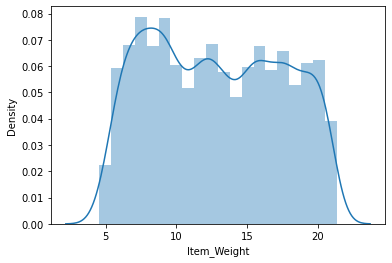

In [14]:
sns.distplot(sales.Item_Weight)
plt.show()

In [15]:
def content(x):
    if (x == 'low fat'):
        return ('Low Fat')
    elif (x == 'LF'):
        return ('Low Fat')
    elif (x == 'reg'):
        return ('Regular')
    else:
        return (x)

In [16]:
sales.Item_Fat_Content = sales.Item_Fat_Content.apply(content)

In [17]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


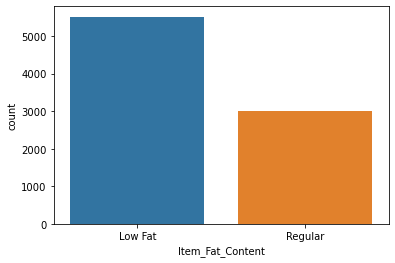

In [18]:
sns.countplot(sales.Item_Fat_Content)
plt.show()

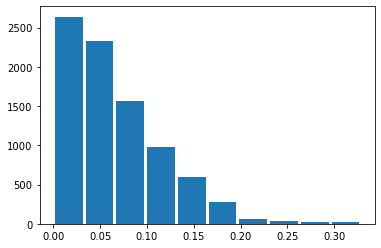

In [19]:
plt.hist(sales.Item_Visibility, rwidth= 0.9)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


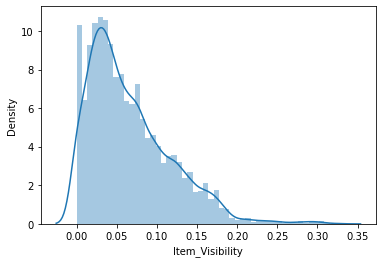

In [20]:
sns.distplot(sales.Item_Visibility)
plt.show()

In [21]:
sales.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [22]:
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables',
              'Frozen Foods', 'Breakfast', 'Breads', 'Seafood']

In [23]:
def perish(x):
    if x in perishables:
        return ('Perishables')
    else:
        return ('Non Perishables')

In [24]:
sales.Item_Type = sales.Item_Type.apply(perish)

In [25]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Perishables,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Non Perishables,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Perishables,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.000000,Perishables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.000000,Non Perishables,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
sales.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


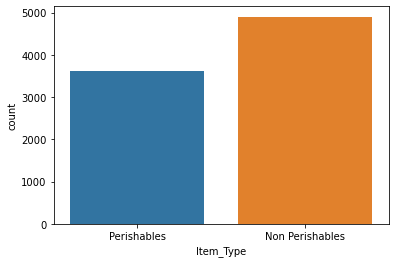

In [27]:
sns.countplot(sales.Item_Type)
plt.show()

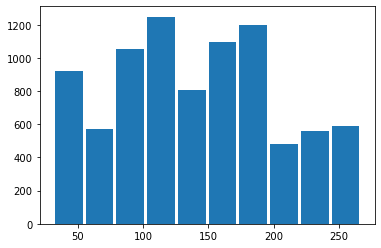

In [28]:
plt.hist(sales.Item_MRP, rwidth=0.9)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


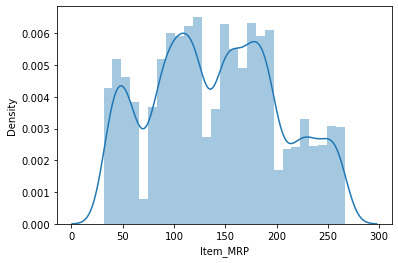

In [29]:
sns.distplot(sales.Item_MRP)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


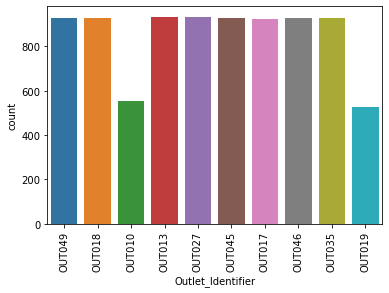

In [30]:
sns.countplot(sales.Outlet_Identifier)
plt.xticks(rotation = 90)
plt.show()

In [31]:
sales.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

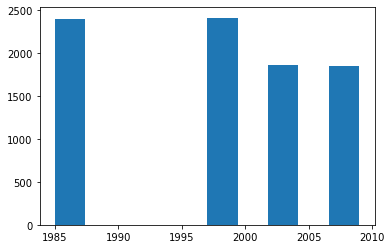

In [32]:
plt.hist(sales.Outlet_Establishment_Year)
plt.show()

In [33]:
sales.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


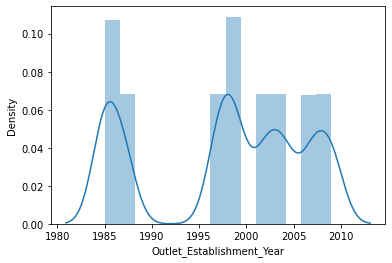

In [34]:
sns.distplot(sales.Outlet_Establishment_Year)
plt.show()

In [35]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [36]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Perishables,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Non Perishables,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Perishables,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.000000,Perishables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.000000,Non Perishables,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [37]:
sales.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [38]:
sales.Item_Weight = sales.Item_Weight.fillna(sales.Item_Weight.mean())

In [39]:
sales.Outlet_Size = sales.Outlet_Size.fillna(method= 'ffill')

In [40]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Perishables,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Non Perishables,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Perishables,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.000000,Perishables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.000000,Non Perishables,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


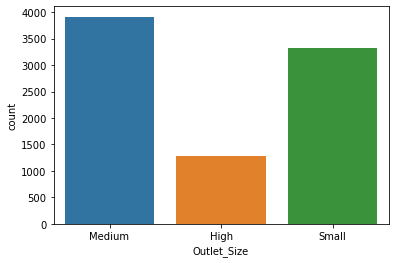

In [41]:
sns.countplot(sales.Outlet_Size)
plt.show()

In [42]:
sales.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


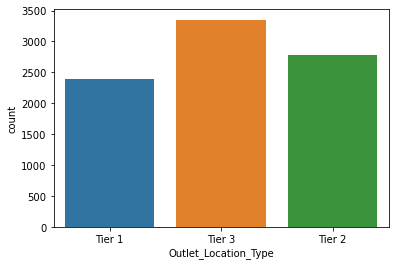

In [43]:
sns.countplot(sales.Outlet_Location_Type)
plt.show()

In [44]:
sales.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


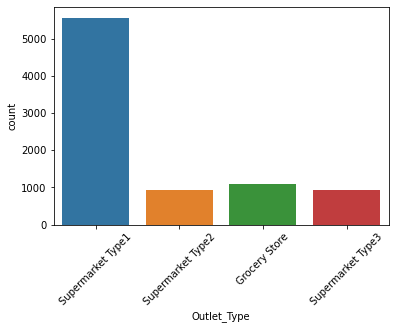

In [45]:
sns.countplot(sales.Outlet_Type)
plt.xticks(rotation = 45)
plt.show()

### Bivariate Analysis

In [46]:
b = []
for i in range(0, len(sales)):
    c = sales.Outlet_Identifier[i][-2:]
    b.append(c)

In [47]:
sales['Outlet_Identifier'] = pd.Series(b)

In [48]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Perishables,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Non Perishables,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Perishables,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.000000,Perishables,182.0950,10,1998,Medium,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.000000,Non Perishables,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


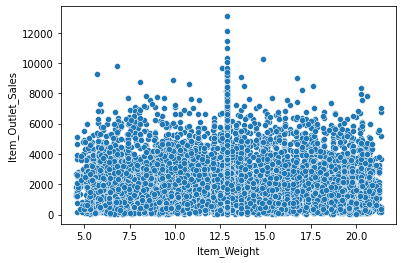

In [49]:
# Item_Weight
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data= sales)
plt.show()

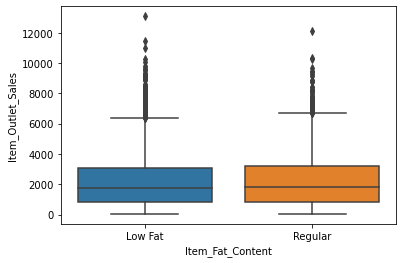

In [50]:
# Item_Fat_Content
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data= sales)
plt.show()

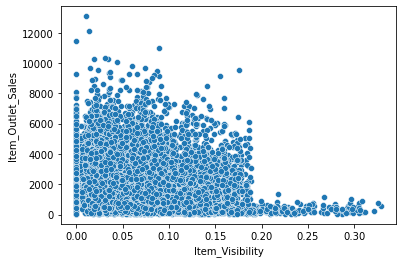

In [51]:
# Item_Visibility
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data= sales)
plt.show()

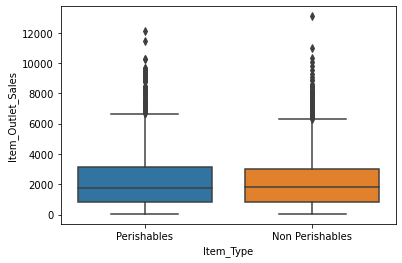

In [52]:
# Item_Type
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data= sales)
plt.show()

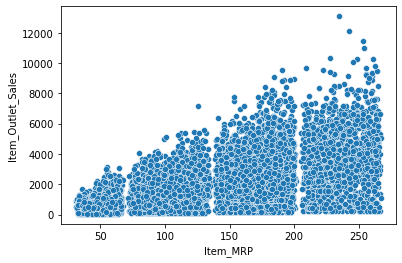

In [53]:
# Item_MRP
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data= sales)
plt.show()

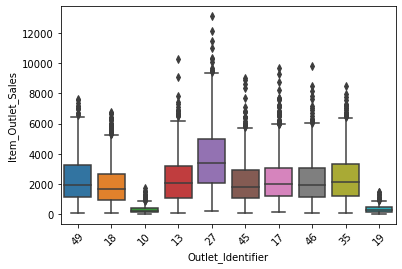

In [54]:
# Outlet_Identifier
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data= sales)
plt.xticks(rotation= 45)
plt.show()

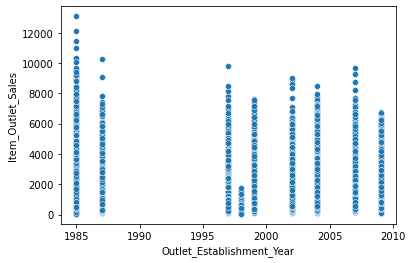

In [55]:
# Outlet_Establishment_Year
sns.scatterplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data= sales)
plt.show()

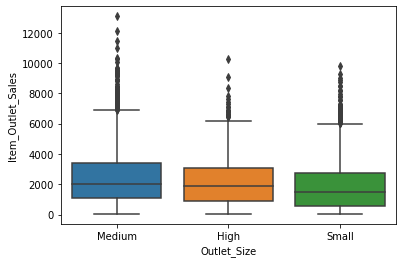

In [56]:
# Outlet_Size
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data= sales)
plt.show()

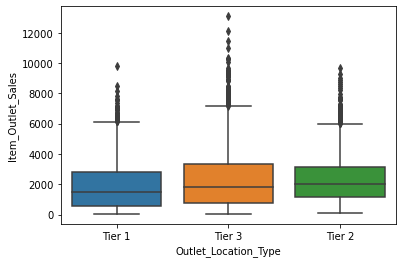

In [57]:
# Outlet_Location_Type
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data= sales)
plt.show()

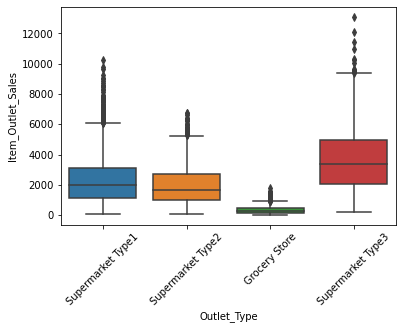

In [58]:
# Outlet_Type
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data= sales)
plt.xticks(rotation = 45)
plt.show()

In [59]:
sales['Outlet_Vintage'] = 2013 - sales.Outlet_Establishment_Year

In [60]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage
0,FD,9.30,Low Fat,0.016047,Perishables,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.92,Regular,0.019278,Non Perishables,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FD,17.50,Low Fat,0.016760,Perishables,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,19.20,Regular,0.000000,Perishables,182.0950,10,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,NC,8.93,Low Fat,0.000000,Non Perishables,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052,26


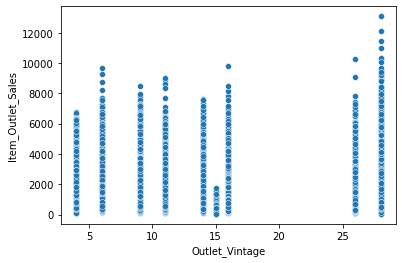

In [61]:
# Outlet_Vintage
sns.scatterplot(x='Outlet_Vintage', y='Item_Outlet_Sales', data= sales)
plt.show()

In [62]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage
0,FD,9.30,Low Fat,0.016047,Perishables,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.92,Regular,0.019278,Non Perishables,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FD,17.50,Low Fat,0.016760,Perishables,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,19.20,Regular,0.000000,Perishables,182.0950,10,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,NC,8.93,Low Fat,0.000000,Non Perishables,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [63]:
sales.Item_Identifier.unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [64]:
sales.Item_Identifier = sales['Item_Identifier'].str.replace("FD","0")
sales.Item_Identifier = sales['Item_Identifier'].str.replace("DR","1")
sales.Item_Identifier = sales['Item_Identifier'].str.replace("NC","2")

In [65]:
sales.Item_Identifier = pd.to_numeric(sales['Item_Identifier'])

In [66]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage
0,0,9.30,Low Fat,0.016047,Perishables,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,1,5.92,Regular,0.019278,Non Perishables,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,0,17.50,Low Fat,0.016760,Perishables,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,0,19.20,Regular,0.000000,Perishables,182.0950,10,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,2,8.93,Low Fat,0.000000,Non Perishables,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [67]:
# Item_Fat_Content
sales.Item_Fat_Content = sales['Item_Fat_Content'].str.replace("Low Fat","0")
sales.Item_Fat_Content = sales['Item_Fat_Content'].str.replace("Regular","1")

In [68]:
sales.Item_Fat_Content = pd.to_numeric(sales['Item_Fat_Content'])

In [69]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage
0,0,9.30,0,0.016047,Perishables,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,1,5.92,1,0.019278,Non Perishables,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,0,17.50,0,0.016760,Perishables,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,0,19.20,1,0.000000,Perishables,182.0950,10,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,2,8.93,0,0.000000,Non Perishables,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [70]:
# Item_Type
sales.Item_Type = sales['Item_Type'].str.replace("Perishables","0")
sales.Item_Type = sales['Item_Type'].str.replace("Non 0","1")

In [71]:
sales.Item_Type = pd.to_numeric(sales['Item_Type'])

In [72]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage
0,0,9.30,0,0.016047,0,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,1,5.92,1,0.019278,1,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,0,17.50,0,0.016760,0,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,0,19.20,1,0.000000,0,182.0950,10,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,2,8.93,0,0.000000,1,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [73]:
# Outlet_Size
sales.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [74]:
sales.Outlet_Size = sales['Outlet_Size'].str.replace("Small","0")
sales.Outlet_Size = sales['Outlet_Size'].str.replace("Medium","1")
sales.Outlet_Size = sales['Outlet_Size'].str.replace("High","2")

In [75]:
sales.Outlet_Size = pd.to_numeric(sales['Outlet_Size'])

In [76]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage
0,0,9.30,0,0.016047,0,249.8092,49,1999,1,Tier 1,Supermarket Type1,3735.1380,14
1,1,5.92,1,0.019278,1,48.2692,18,2009,1,Tier 3,Supermarket Type2,443.4228,4
2,0,17.50,0,0.016760,0,141.6180,49,1999,1,Tier 1,Supermarket Type1,2097.2700,14
3,0,19.20,1,0.000000,0,182.0950,10,1998,1,Tier 3,Grocery Store,732.3800,15
4,2,8.93,0,0.000000,1,53.8614,13,1987,2,Tier 3,Supermarket Type1,994.7052,26


In [77]:
# Outlet_Location_Type
sales.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [78]:
sales.Outlet_Location_Type = sales['Outlet_Location_Type'].str.replace("Tier 1","1")
sales.Outlet_Location_Type = sales['Outlet_Location_Type'].str.replace("Tier 2","2")
sales.Outlet_Location_Type = sales['Outlet_Location_Type'].str.replace("Tier 3","3")

In [79]:
sales.Outlet_Location_Type = pd.to_numeric(sales['Outlet_Location_Type'])

In [80]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage
0,0,9.30,0,0.016047,0,249.8092,49,1999,1,1,Supermarket Type1,3735.1380,14
1,1,5.92,1,0.019278,1,48.2692,18,2009,1,3,Supermarket Type2,443.4228,4
2,0,17.50,0,0.016760,0,141.6180,49,1999,1,1,Supermarket Type1,2097.2700,14
3,0,19.20,1,0.000000,0,182.0950,10,1998,1,3,Grocery Store,732.3800,15
4,2,8.93,0,0.000000,1,53.8614,13,1987,2,3,Supermarket Type1,994.7052,26


In [81]:
# Outlet_Type
sales.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [82]:
sales.Outlet_Type = sales['Outlet_Type'].str.replace("Grocery Store","0")
sales.Outlet_Type = sales['Outlet_Type'].str.replace("Supermarket Type1","1")
sales.Outlet_Type = sales['Outlet_Type'].str.replace("Supermarket Type2","2")
sales.Outlet_Type = sales['Outlet_Type'].str.replace("Supermarket Type3","3")

In [83]:
sales.Outlet_Type = pd.to_numeric(sales['Outlet_Type'])

In [84]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage
0,0,9.30,0,0.016047,0,249.8092,49,1999,1,1,1,3735.1380,14
1,1,5.92,1,0.019278,1,48.2692,18,2009,1,3,2,443.4228,4
2,0,17.50,0,0.016760,0,141.6180,49,1999,1,1,1,2097.2700,14
3,0,19.20,1,0.000000,0,182.0950,10,1998,1,3,0,732.3800,15
4,2,8.93,0,0.000000,1,53.8614,13,1987,2,3,1,994.7052,26


In [85]:
lm = LinearRegression()
sc = StandardScaler() 

In [86]:
x = sales.drop(['Item_Outlet_Sales'], axis=1)
y = sales['Item_Outlet_Sales']

In [89]:
trainaccuracy = []
testaccuracy = []
for i in range(1,1000):
    X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                       test_size= 0.25,
                                                       random_state= i)
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    lm.fit(scaledX_train, y_train)
    trainaccuracy.append(lm.score(scaledX_train, y_train))
    testaccuracy.append(lm.score(scaledX_test, y_test))
print('trainaccuracy : ', np.mean(trainaccuracy))
print('testaccuracy : ', np.mean(testaccuracy))
print('Bias error : ', 1 - np.mean(testaccuracy))
print('variance error : ', np.var(testaccuracy, ddof= 1))

trainaccuracy :  0.511463973448023
testaccuracy :  0.5086171003937615
Bias error :  0.4913828996062385
variance error :  0.00016230711084672247


In [90]:
from sklearn.tree import DecisionTreeRegressor

In [95]:
trainaccuracy = []
testaccuracy = []
for i in range(1,1000):
    X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                       test_size= 0.25,
                                                       random_state= i)
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    dt = DecisionTreeRegressor(max_depth= 5)
    dt.fit(scaledX_train, y_train)
    trainaccuracy.append(dt.score(scaledX_train, y_train))
    testaccuracy.append(dt.score(scaledX_test, y_test))
print('trainaccuracy : ', np.mean(trainaccuracy))
print('testaccuracy : ', np.mean(testaccuracy))
print('Bias error : ', 1 - np.mean(testaccuracy))
print('variance error : ', np.var(testaccuracy, ddof= 1))

trainaccuracy :  0.6054951170477455
testaccuracy :  0.5911553377035939
Bias error :  0.40884466229640615
variance error :  0.0001822273257140675


In [96]:
from sklearn.ensemble import BaggingRegressor

In [97]:
trainaccuracy = []
testaccuracy = []
for i in range(1,1000):
    X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                       test_size= 0.25,
                                                       random_state= i)
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    bc = BaggingRegressor(base_estimator= DecisionTreeRegressor(max_depth= 5))
    bc.fit(scaledX_train, y_train)
    trainaccuracy.append(bc.score(scaledX_train, y_train))
    testaccuracy.append(bc.score(scaledX_test, y_test))
print('trainaccuracy : ', np.mean(trainaccuracy))
print('testaccuracy : ', np.mean(testaccuracy))
print('Bias error : ', 1 - np.mean(testaccuracy))
print('variance error : ', np.var(testaccuracy, ddof= 1))

trainaccuracy :  0.6102345398402118
testaccuracy :  0.5956151910924459
Bias error :  0.4043848089075541
variance error :  0.00017169700992277555


In [98]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
trainaccuracy = []
testaccuracy = []
for i in range(1,1000):
    X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                       test_size= 0.25,
                                                       random_state= i)
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    rfr = RandomForestRegressor(max_depth= 5)
    rfr.fit(scaledX_train, y_train)
    trainaccuracy.append(rfr.score(scaledX_train, y_train))
    testaccuracy.append(rfr.score(scaledX_test, y_test))
print('trainaccuracy : ', np.mean(trainaccuracy))
print('testaccuracy : ', np.mean(testaccuracy))
print('Bias error : ', 1 - np.mean(testaccuracy))
print('variance error : ', np.var(testaccuracy, ddof= 1))

trainaccuracy :  0.6113598898900051
testaccuracy :  0.5967249369898058
Bias error :  0.4032750630101942
variance error :  0.00016882720111784086


In [101]:
pred1 = dt.fit(scaledX_train, y_train).predict(scaledX_test)

In [103]:
 df = pd.DataFrame({'Actual': y_test, 'Prediction': pred1})

In [104]:
df.head()

,Actual,Prediction
2282,6439.6176,3220.648287
3585,1448.7808,2513.869834
5358,4288.4178,3924.317967
34,2085.2856,3013.781889
4930,3870.9612,3225.204950


In [105]:
mean_squared_error(y_test, pred1)

1229866.3374409068

In [106]:
mean_absolute_error(y_test, pred1)

784.5756546368648

In [107]:
np.sqrt(mean_squared_error(y_test, pred1))

1108.993389268352

In [108]:
r2_score(y_test, pred1)

0.5998393588552258

In [109]:
pred2 = bc.fit(scaledX_train, y_train).predict(scaledX_test)

In [110]:
mean_squared_error(y_test, pred2)

1204520.5158541088

In [111]:
mean_absolute_error(y_test, pred2)

775.9028768378737

In [112]:
np.sqrt(mean_squared_error(y_test, pred2))

1097.5064992309196

In [113]:
r2_score(y_test, pred2)

0.6080861088537811